In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Height-Weight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [5]:
df.rename(columns={'Height(Inches)' : 'Height', 'Weight(Pounds)': 'Weight'}, inplace=True)
# df['Height'] = df['Height(Inches)']
# df['Weight'] = df['Weight(Pounds)']
# df.drop(['Height(Inches)','Weight(Pounds)'],axis=1,inplace=True)
df

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [6]:
df.drop('Index',axis=1,inplace=True)
df

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [7]:
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.453592

In [8]:
df

,Height,Weight
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010
...,...,...
24995,176.535461,53.538008
24996,163.952580,54.518674
24997,164.334317,53.644285
24998,171.524117,59.995797


Text(0, 0.5, 'Height')

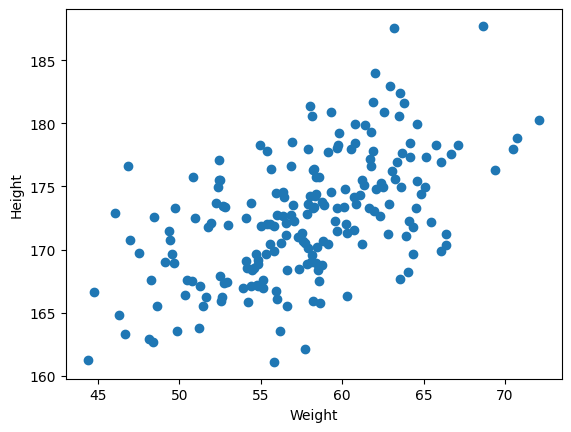

In [9]:
#plotting first 200 data points to see the nature of the data how it looks when plotted
plt.scatter(df['Weight'].loc[0:200], df['Height'].loc[0:200])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


In [11]:
import seaborn as sns

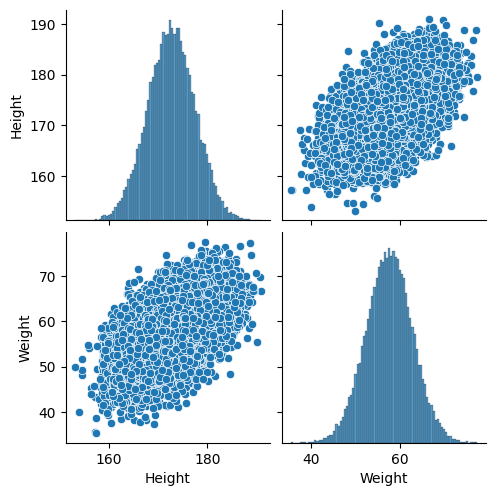

In [12]:
sns.pairplot(df)

In [13]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [14]:
x = df[['Weight']]   #--> always try to keep the independent features in the two dimentional array or dataframe
y = df['Height']     #--> this can be in series of one dimentional array
x_series = df['Weight']

x, x_series

(          Weight
 0      51.252494
 1      61.909547
 2      69.411778
 3      64.562199
 4      65.452010
 ...          ...
 24995  53.538008
 24996  54.518674
 24997  53.644285
 24998  59.995797
 24999  56.641938
 
 [25000 rows x 1 columns],
 0        51.252494
 1        61.909547
 2        69.411778
 3        64.562199
 4        65.452010
            ...    
 24995    53.538008
 24996    54.518674
 24997    53.644285
 24998    59.995797
 24999    56.641938
 Name: Weight, Length: 25000, dtype: float64)

In [15]:
x.shape, x_series.shape, y.shape

((25000, 1), (25000,), (25000,))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state = 42)

In [18]:
x_train.shape

(16250, 1)

In [19]:
#standardisation:  in this we will apply z-score = (xi - u)/ sigma  and then we will get the feature with mean = 0 and standard deviation = 1. so converting the mean to 0 and sigma to 1 using z score.
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
#When you call StandardScaler.fit(X_train), what it does is calculate the mean and variance from the values in X_train. Then calling .transform() will transform 
#all of the features by subtracting the mean and dividing by the variance. For convenience, these two function calls can be done in one step using fit_transform().
#The reason you want to fit the scaler using only the training data is because you don't want to bias your model with information from the test data.
#If you fit() to your test data, you'd compute a new mean and variance for each feature. In theory these values may be very similar if your test and train sets have the same distribution, but in practice this is typically not the case.
#Instead, you want to only transform the test data by using the parameters computed on the training data.


#when we say fit_transform it will get the mean and the standard deviation of this x_train variable
x_train = scaler.fit_transform(x_train)

In [22]:
#when we say just transform it will use the mean and the standard deviation of the previous of x_train variable
x_test = scaler.transform(x_test)

In [23]:
x_test

array([[ 0.62298549],
       [-1.2984394 ],
       [ 0.76947553],
       ...,
       [-0.3468051 ],
       [-0.50352259],
       [ 0.45951858]], shape=(8750, 1))

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()

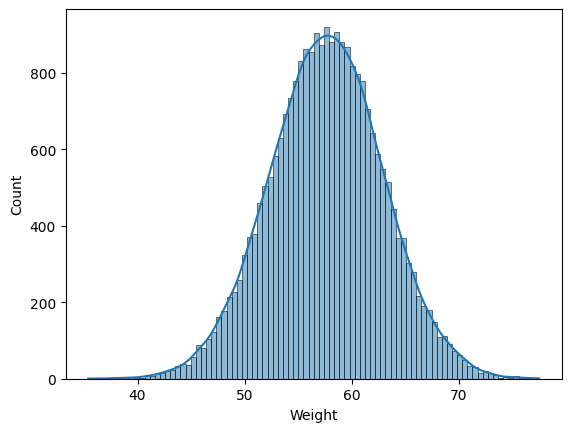

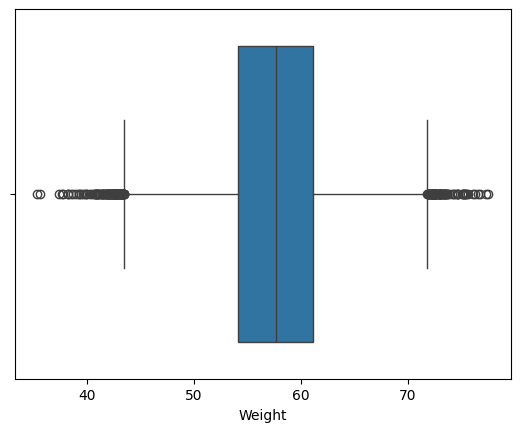

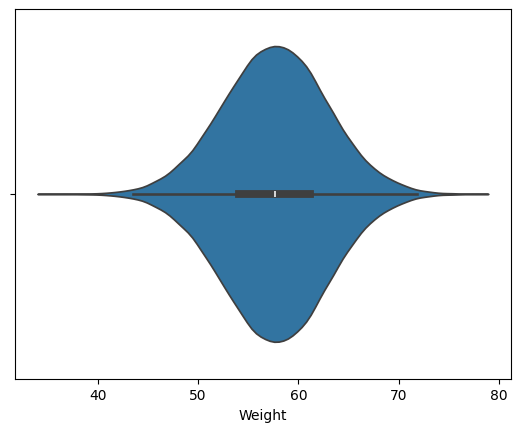

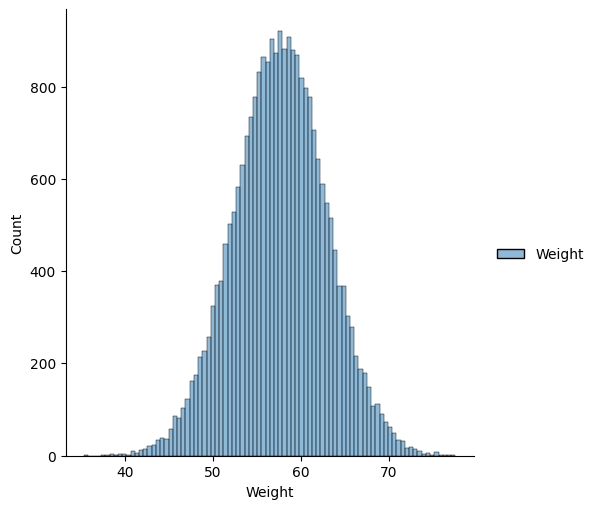

In [26]:
#let's check data's distribution
sns.histplot(data = x,kde = True, x = 'Weight')
plt.show()
sns.boxplot(data = x, x = "Weight")
plt.show()
sns.violinplot(data=x, x = 'Weight')
plt.show()
sns.displot(x)
plt.xlabel('Weight')
plt.show()

In [ ]:
''' 
Normalization and standardization are both data scaling techniques used in machine learning and data science to transform data to a common scale, but they do so differently. 
Normalization scales data to a predefined range, often, while standardization centers data around zero and scales it to a unit standard deviation. 


Normalization: 
Purpose:
Scales data to a specific range, typically or [-1, 1], preserving the shape of the original distribution. 

Suitable for:
Situations where the data's distribution is unknown or non-normal, and outliers might be present. 

Example:
Max-Min normalization, where each value is mapped to a new range based on the maximum and minimum values in the dataset. 


Standardization:
Purpose:
Transforms data to a standard normal distribution (mean = 0, standard deviation = 1) by subtracting the mean and dividing by the standard deviation. 

Suitable for:
Data that follows a normal (Gaussian) distribution or when the algorithm requires a normal distribution, like in PCA. 

Example:
Z-score normalization, where each value is transformed by subtracting the mean and dividing by the standard deviation. 


Key Differences:
Range:
Normalization has a fixed range, while standardization does not. 

Distribution:
Normalization preserves the original distribution, while standardization transforms it to a standard normal distribution. 

Outliers:
Normalization can be sensitive to outliers, as they can significantly affect the scaling. Standardization is more robust to outliers because it doesn't rely on a fixed range. 

Applications:
Normalization is preferred when data has varying ranges and when the algorithm doesn't assume a normal distribution. Standardization is preferred when data follows a normal distribution 
or when the algorithm requires it. 
'''

In [27]:
regressor.fit(x_series, y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [28]:
#that's asked to make x as two dimentional
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
regressor

LinearRegression()

In [30]:
#this is actually beta1 or theta1 of the equation which is a slope. Which simply says that one unit movement in the weight means if weight is increased by 1 kg the y means height will be 
# increased by 2.425 units.
print("coefficient or slope: ", regressor.coef_)


#this is actually beta0 or theta0 of the equation which is a intercept. Which simply says that if theta1 or beta1 is zero then the height or y will be 67.998 which is not so possible but maths says that 
# as if weight is zero height will be 172.717 cms

print("Intercept: ", regressor.intercept_)

coefficient or slope:  [2.42572489]
Intercept:  172.7170892068923


In [31]:
type(regressor.predict(x_train))

numpy.ndarray

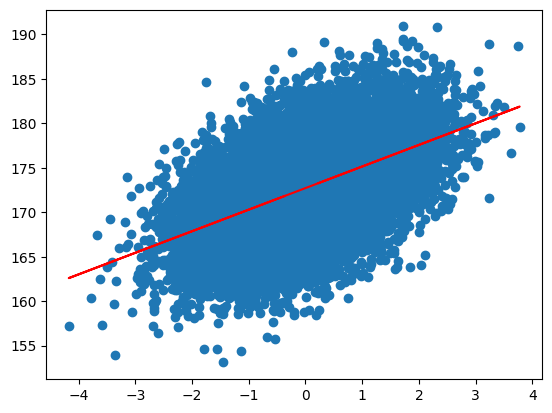

In [32]:
#let's plot training data and line
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')

In [33]:
# y_pred = intercept + coef(x_test)
y_pred = regressor.predict(x_test)

In [34]:
y_test.shape == y_pred.shape

True

In [35]:
#let's check the preformance
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, "\n", mae, "\n", rmse)

17.48668835567745 
 3.329906661438278 
 4.181708784178718


In [37]:
#R^2 = SSR / SST --> SSR = Sum of square of residual or error , SST = Sum of sqared of total , R^2 = coefficient of diterminant
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.25309673853041237

In [38]:
#adjusted R^2 = 1 - [(1-R2)*(n-1) / (n-k-1)]       n = number of observations or samples , k = number of predictor variables/ independent variables

adjusted_r2 = 1 - (((1-score)*(len(y_test)-1)) / (len(y_test)-x_test.shape[1]-1))

In [39]:
adjusted_r2

0.25301135864227

In [42]:
import statsmodels.api as sm

In [43]:
model = sm.OLS(y_train, x_train).fit()

In [48]:
y_predict_OLS = model.predict(x_test)
y_predict_OLS

array([ 1.51119141, -3.14965678,  1.86653595, ..., -0.84125377,
       -1.22140727,  1.11466566], shape=(8750,))

In [50]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.203
Date:                Sat, 17 May 2025   Prob (F-statistic):                      0.0735
Time:                        19:12:21   Log-Likelihood:                     -1.0678e+05
No. Observations:               16250   AIC:                                  2.136e+05
Df Residuals:                   16249   BIC:                                  2.136e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#if we want to predict for Weight 58 what will be the height of person having weight of 58kg


regressor.predict([[58]])

array([313.40913292])

In [54]:
#313 is not a possible height in centimeters. we have to standardise the new value 58 as well
regressor.predict(scaler.transform([[58]]))

c:\Users\p3pra\Desktop\code\practice\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([172.88816149])

## Multiple Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('index_price.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [4]:
df = df[df['year'].isin((2016,2017))]

In [5]:
df.columns

Index(['year', 'month', 'interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [6]:
df.shape

(24, 5)

In [7]:
df.reset_index(inplace=True)


In [10]:
df.drop(columns=['index','year','month'],inplace=True)

In [11]:
df

,interest_rate,unemployment_rate,index_price
0,2.30,4.99,184.040178
1,2.67,6.26,163.338471
2,3.21,8.02,143.007065
3,1.75,5.20,-8.822741
4,2.41,4.15,307.748828
5,3.85,5.28,633.650508
6,1.68,5.65,-78.567930
7,4.83,6.36,822.275239
8,3.08,6.31,285.060710
9,2.14,2.98,348.846955


In [12]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [13]:
import seaborn as sns

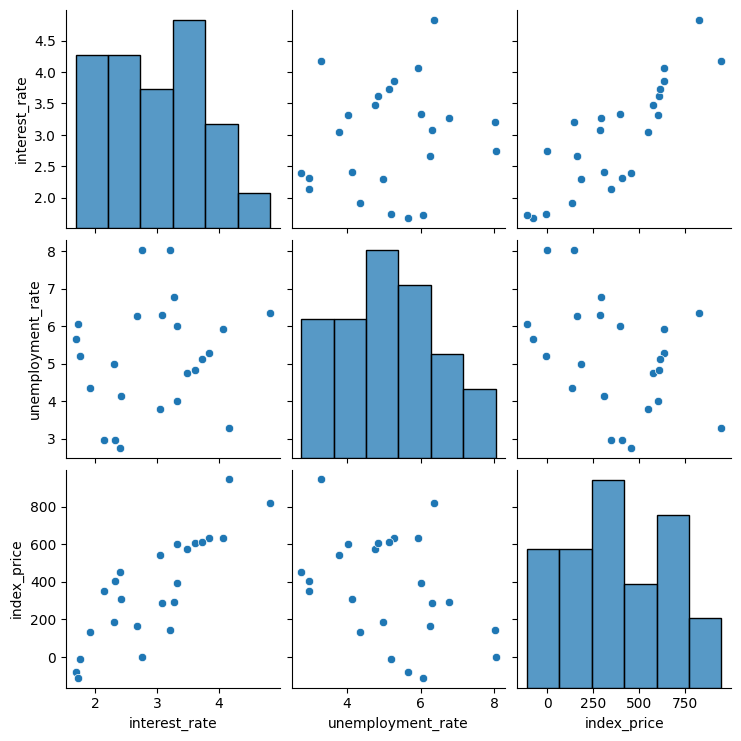

In [14]:
sns.pairplot(data=df)

In [15]:
df.corr()
#index price and unemployment rate's negative correlation means when one increase the other will decrease 

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.172900,0.838717
unemployment_rate,0.172900,1.000000,-0.391352
index_price,0.838717,-0.391352,1.000000


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

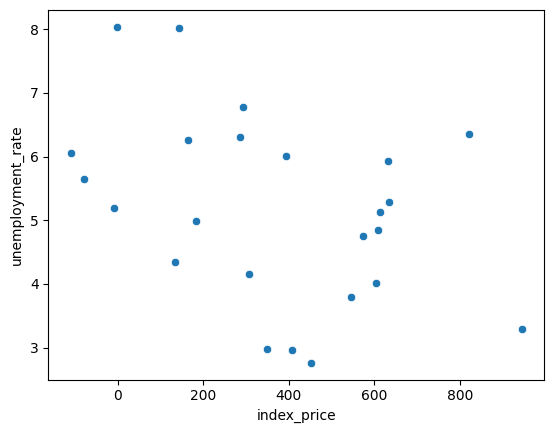

In [16]:
sns.scatterplot(data=df, x = df['index_price'], y = df['unemployment_rate'])

In [17]:
#get independent and dependent features
x = df[['interest_rate', 'unemployment_rate']]
y = df.iloc[:,-1]

In [18]:
df.iloc[12,1]

# is same as 

df.iloc[12][1]

C:\Users\p3pra\AppData\Local\Temp\ipykernel_23460\2421603016.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[12][1]


np.float64(4.35)

In [19]:
print(x.head())
y.head()

   interest_rate  unemployment_rate
0           2.30               4.99
1           2.67               6.26
2           3.21               8.02
3           1.75               5.20
4           2.41               4.15


0    184.040178
1    163.338471
2    143.007065
3     -8.822741
4    307.748828
Name: index_price, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [30]:
sns.__version__

'0.13.2'

<Axes: xlabel='index_price', ylabel='interest_rate'>

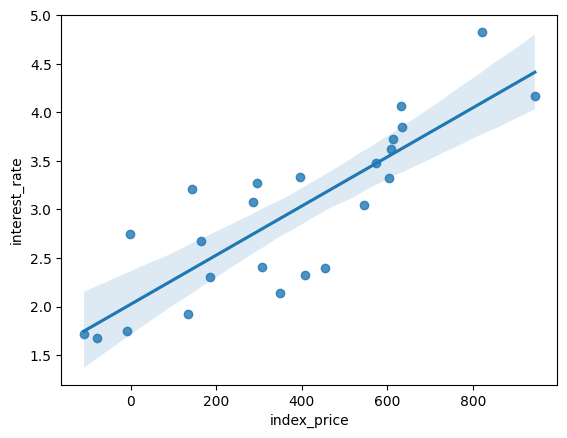

In [ ]:
#regplot plots data and a linear regression model fit.

sns.regplot(data=df,x="index_price", y="interest_rate")

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

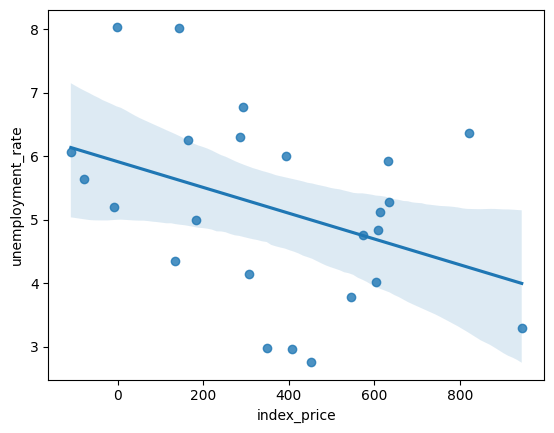

In [35]:
sns.regplot(x=df["index_price"], y=df['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

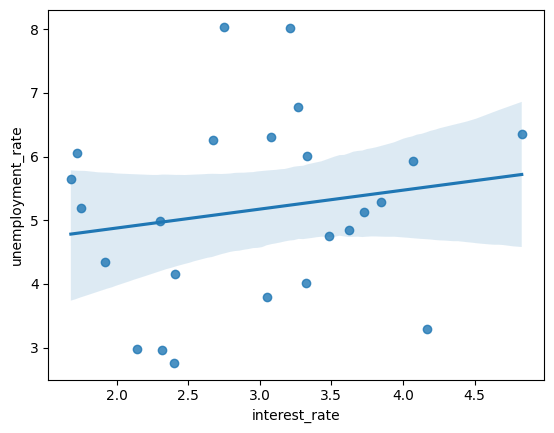

In [36]:
sns.regplot(x=df["interest_rate"], y=df["unemployment_rate"])

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.12769418,  0.97912345],
       [ 1.24314043,  0.69913999],
       [-0.75114225,  0.00654932],
       [-0.24412123,  2.25378501],
       [ 0.40937253,  0.75808388],
       [-0.93141639, -1.47441584]])

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [41]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#we will try to do cross validation. Consider we had 24 records. 25% we chose to be test data and 75% to be training data. Now while training we will not consider test data. 
# out of train data that is 75% of 24 = 18 records we consider based on cv value here 3 we will split the 18 records in 3 parts. 6 rows each. 
# 6 validation - 12 training
# 6 training - 6 validation - 6 training
# 12 training - 6 validation
# this way in three iteration if we train the model regressor then what error we will get depending on which we gave in neg_mean_squared_error. 
# more closer the errors to 0 more better. We can always go for average of the errors we got.

In [47]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor,x_train,y_train,scoring="neg_mean_squared_error", cv = 3)

In [48]:
validation_score

array([-0.00088851, -0.00039143, -0.00120741])

In [49]:
np.mean(validation_score)

np.float64(-0.0008291185737220912)

In [50]:
#prediction
y_pred = regressor.predict(x_test)

In [51]:
y_pred

array([285.07992055, 632.51169679, 184.07229887,  -1.74413304,
       394.57841245, 348.86123217])

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mae, "\n", mse, '\n', rmse)

0.0014934245868079637 
 0.0014934245868079637 
 0.038644852009135235


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9999999603950677

In [56]:
#adjusted R^2 = 1 - [(1-R2)*(n-1) / (n-k-1)]       n = number of observations or samples , k = number of predictor variables/ independent variables

adjusted_r2 = 1 - (((1-r2)*(len(y_test)-1)) / (len(y_test)-x_test.shape[1]-1))
adjusted_r2

0.9999999339917794

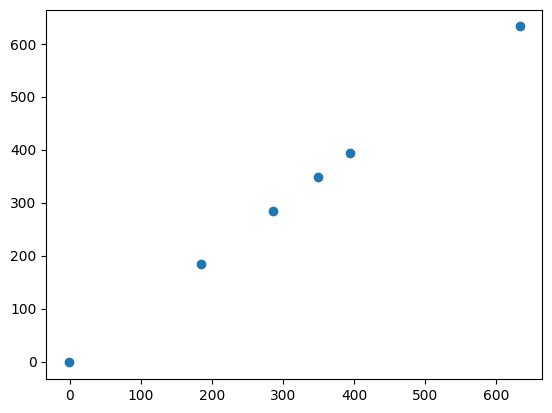

In [ ]:
#Assumptions
plt.scatter(y_test,y_pred)
#the relation of y_test and y_pred usually should be linear.

In [ ]:
print(y_test-y_pred)
#this is residuals or error

8    -0.019210
16   -0.067021
0    -0.032121
18    0.029263
11    0.044808
9    -0.014277
Name: index_price, dtype: float64


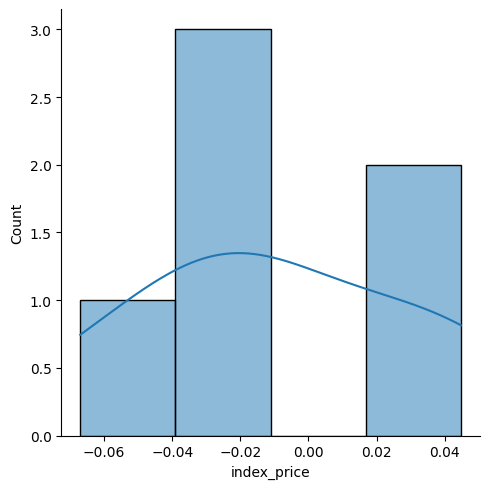

In [ ]:
sns.displot(y_test-y_pred, kde=True)
#the curve like normal distribution is good.

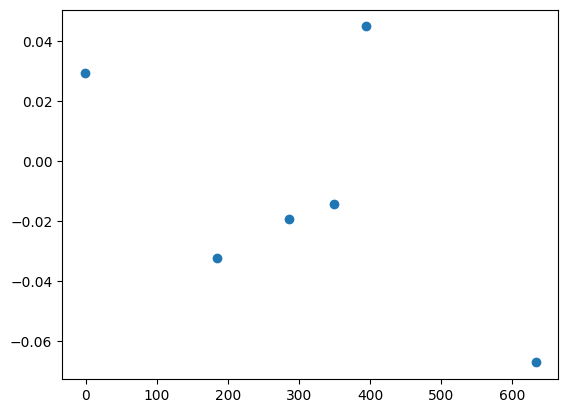

In [ ]:
plt.scatter(y_pred, y_test-y_pred)
#uniformly distributed is good and there is nothing to worry

In [62]:
import statsmodels.api as sm

In [63]:
model = sm.OLS(y_train,x_train).fit()
model

In [64]:
model.summary()

c:\Users\p3pra\Desktop\code\practice\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.083e+06
Date:                Mon, 19 May 2025   Prob (F-statistic):                    2.17e-46
Time:                        02:07:17   Log-Likelihood:                         -18.798
No. Observations:                  18   AIC:                                      41.60
Df Residuals:                      16   BIC:                                      43.38
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       310.4785      0.154   2017.872      0.000     310.152     310.805
unemployment_rate  -106.3099      0.092  -1151.941      0.000    -106.506    -106.114
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.584
Skew:                          -0.299   Prob(JB):                        0.747
Kurtosis:                       2.352   Cond. No.                         6.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
regressor.coef_

array([ 310.0005245, -106.6612026])

In [66]:
regressor.intercept_

np.float64(3.3104934825884698)

In [ ]:
#new chagnes 